# Restaurant Sentiment Classification

#### Developers
- Simon Manna [Machine Learning & AI Engineer] 
- Merhawi Tsegay [Machine Learning Engineer]

#### Import Python Libraries

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import spacy
import seaborn as sns

#### Load Data

In [4]:
# Prepare dataset
data = pd.read_csv('C:\\datasets\\restaurant_reviews.csv')

In [ ]:
#### Make EDA

In [37]:
#display the first five data rows
data.head()

,Review,Liked
0,wow love place,1.0
1,crust good,0.0
2,tasty texture nasty,0.0
3,stop late bank holiday rick steve recommendati...,1.0
4,selection menu great price,1.0


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  2220 non-null   object 
 1   Liked   2117 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.8+ KB
None


In [7]:
# Check the shape of the dataset
print(data.shape)

(2220, 2)


#### Check for Data Skewness

In [47]:
# Chedk the categories of the sentiment review we have
print(data.groupby('Liked').count())

       Review
Liked        
0.0      1018
1.0      1099


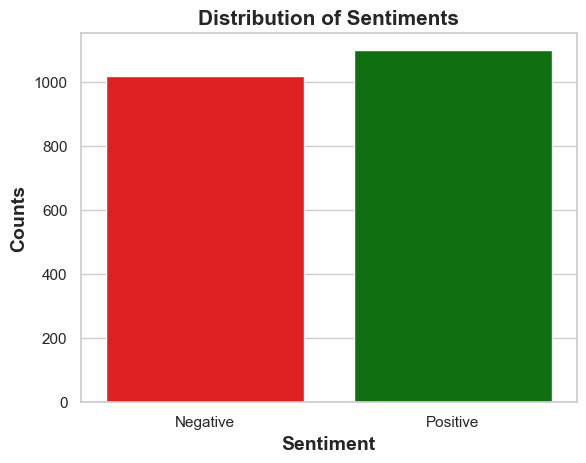

In [64]:
sns.set(style="whitegrid", color_codes=True)
ax = sns.countplot(data=data, x='Liked',  hue='Liked', palette=['red', 'green'], legend=False)
ax.set_xticks(range(len(['Negative', 'Positive'])))
# Set custom labels for the x-axis ticks
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)
plt.title("Distribution of Sentiments", size=15, weight="bold")
plt.xlabel("Sentiment", size=14, weight="bold")
plt.ylabel("Counts", size=14, weight="bold")
# Show the plot
plt.show()

In [8]:
# Check for null values
print(data.isna().sum())

Review      0
Liked     103
dtype: int64


In [9]:
# Drop the null values
data.dropna(axis=0, inplace=True)

In [68]:
# Load the small or medium spacy English corpus
nlp = spacy.load("en_core_web_md")

In [69]:
# check the first Row Review, to see how the data looks like.
doc = nlp(data.iloc[0]['Review'])

print(f"Token","POS","Lemma")
for token in doc:
    print(token.text, token.pos_, token.lemma_) #, spacy.spacy_explain(token.lemma_)

Token POS Lemma
wow INTJ wow
love NOUN love
place NOUN place


In [70]:
# Check the spacy process pipeline
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x000001AEBA063520>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x000001AEBA063D60>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x000001AEB1915770>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x000001AEBA1EBC40>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x000001AEBA220A80>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x000001AEB9FE4B30>)]


### Remove Emojis (Replace the Emojis with Text Data)

In [71]:
# Convert Emojis to test
import emoji
def convert_emoji_to_text(emoji_text):
    text_with_aliases = emoji.demojize(emoji_text)
    return text_with_aliases

In [72]:
data['Review'] = data['Review'].apply(convert_emoji_to_text)

### Preprocess and Clean the data

In [73]:
# Remove the Non Alphanumeric words
data['Review'] = data['Review'].apply(lambda x: re.sub(r'[\W_]+', ' ',x))

In [74]:
# Make the text into lower case
data['Review'] = data['Review'].str.lower()

In [75]:
# Remove Stop Words
def remove_stop_words(doc):
    return " ".join([token.text for token in nlp(doc) if not token.is_stop])

data['Review'] = data['Review'].apply(remove_stop_words)

In [76]:
# Lemmatize the words to their base/root word
def lemmatize_text(text):
    return " ".join([token.lemma_ for token in nlp(text)])

data['Review'] = data['Review'].apply(lemmatize_text)

### Frequent words Analysis ( See the most common words in the comments)

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [78]:
text_data = data['Review']

In [79]:
text = " ".join(text_data.values)

In [80]:
wordcloud = WordCloud(background_color='white').generate(text)

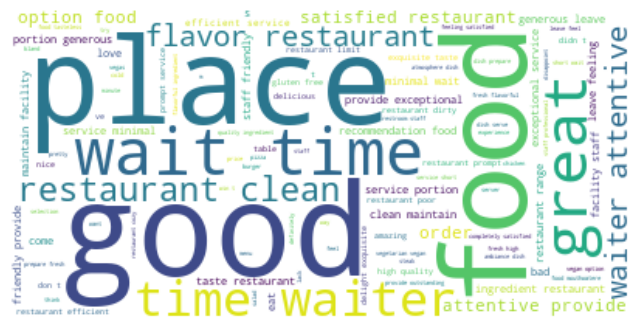

In [81]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Feature Extraction and Vectorization

In [82]:
# Vectorize using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Review']).toarray()
print(X.shape)

(2117, 1779)


In [83]:
# Prepare y(target value)
y = data['Liked']

#### Prepare Training and Test Data

In [84]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Models

In [32]:
# Import Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

In [33]:
# Initialize algorithms
logistic_classifier = LogisticRegression()
multinomial_classifier = MultinomialNB()
decision_tree_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
random_forest_classifier = RandomForestClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Model Algorithms List
algorithms = [logistic_classifier, multinomial_classifier, decision_tree_classifier, 
              svm_classifier, random_forest_classifier, xgb_clf]

In [34]:
for algorithm in algorithms:
    print(f"{algorithm.__class__.__name__}")
    # Train the Algorithm
    algorithm.fit(X_train,y_train)
    # Make Prediction
    y_pred = algorithm.predict(X_test)
    # Measure Accuracy
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    # Classification Report
    print("Classification Report: ")
    eval_result = classification_report(y_test, y_pred)
    print(eval_result)

LogisticRegression
Accuracy: 0.8773584905660378
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88       194
         1.0       0.95      0.81      0.88       230

    accuracy                           0.88       424
   macro avg       0.88      0.88      0.88       424
weighted avg       0.89      0.88      0.88       424

MultinomialNB
Accuracy: 0.875
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       194
         1.0       0.88      0.89      0.89       230

    accuracy                           0.88       424
   macro avg       0.87      0.87      0.87       424
weighted avg       0.87      0.88      0.87       424

DecisionTreeClassifier
Accuracy: 0.8537735849056604
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       194
         1.0       0.90      0.82  

### Hyper Parameter Tuning

### Deep Learning based Sentiment Analysis

In [65]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (C:\Users\Simon\anaconda3\envs\tf\lib\site-packages\keras\preprocessing\sequence.py)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

In [87]:
from keras.preprocessing.text import one_hot, Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM

In [89]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [99]:
# Function remove_tags to handles HTML tags
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''
    return TAG_RE.sub('', text) 

In [100]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    sentence = sen.lower()
    # Remove html tags
    sentence = remove_tags(sentence)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)
    return sentence   

In [98]:
print(data['Review'])

0                                          wow love place
1                                              crust good
2                                     tasty texture nasty
3       stop late bank holiday rick steve recommendati...
4                              selection menu great price
                              ...                        
2118                portion meager leave feel unsatisfied
2119            restaurant dirty restroom unpleasant odor
2120                          waiter slow forgetful order
2121                          food poorly cook taste burn
2122                 restaurant cold unwelcoming ambiance
Name: Review, Length: 2117, dtype: object


In [102]:
X = []
sentences = list(data['Review'])
for sen in sentences:
    X.append(sen)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [104]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

# Adding 1 to store dimensions for words for which no pretrained word embeddings exist
vocab_length = len(word_tokenizer.word_index) + 1

# Padding all reviews to fixed length 100
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [111]:
# Load GloVe word embeddings and create an Embeddings Dictionary
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open('C:\\datasets\\glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Print Embedding Matrix shape
embedding_matrix.shape

(1612, 100)

In [117]:
from keras.layers import LSTM

# Neural Network architecture
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128, return_sequences=True))  # First hidden LSTM layer
lstm_model.add(LSTM(64, return_sequences=True))   # Second hidden LSTM layer
lstm_model.add(Dense(1, activation='sigmoid'))

# Model compiling
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(lstm_model.summary())

# Model Training
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          161200    
                                                                 
 lstm_9 (LSTM)               (None, 100, 128)          117248    
                                                                 
 lstm_10 (LSTM)              (None, 100, 64)           49408     
                                                                 
 dense_5 (Dense)             (None, 100, 1)            65        
                                                                 
Total params: 327,921
Trainable params: 166,721
Non-trainable params: 161,200
_________________________________________________________________
None
Epoch 1/20
11/11 [==============================] - 11s 467ms/step - loss: 0.6874 - accuracy: 0.5193 - val_loss: 0.6556 - val_accuracy: 0.6393
Epoch 2/20
11/11 [========

14/14 [==============================] - 1s 39ms/step - loss: 0.4213 - accuracy: 0.8692
Test Score: 0.4213499128818512
Test Accuracy: 0.8691509962081909


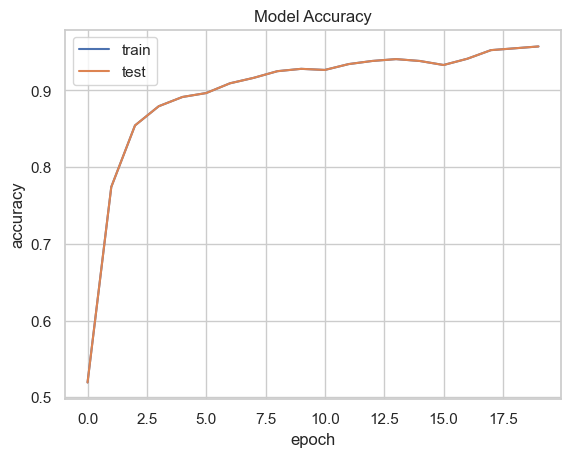

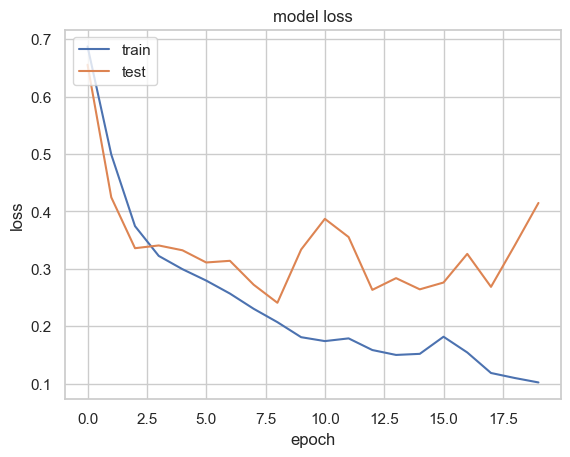

In [133]:
# Predictions on the Test Set
score = lstm_model.evaluate(X_test, y_test, verbose=1)

# Model Performance
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

# Model Performance Charts
import matplotlib.pyplot as plt
plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [132]:
import numpy as np
new_reviews = ["The food was amazing!", "Service was terrible."]
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = word_tokenizer.texts_to_sequences(new_reviews)

# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=maxlen)

# Passing tokenised instance to the LSTM model for predictions
unseen_sentiments = lstm_model.predict(unseen_padded)
# print(unseen_sentiments[0])
# print(np.argmax(unseen_sentiments, axis=1))
predictions = np.argmax(unseen_sentiments, axis=1)
for review, prediction in zip(new_reviews, predictions):
    print(f"Review: {review}\nSentiment: {'Positive' if prediction > 0.5 else 'Negative'}\n")

1/1 [==============================] - 0s 53ms/step
Review: The food was amazing!
Sentiment: Positive

Review: Service was terrible.
Sentiment: Negative



In [106]:
# Build the LSTM model
model = tf.keras.Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions on new restaurant reviews
new_reviews = ["The food was amazing!", "Service was terrible."]
new_reviews_seq = tokenizer.texts_to_sequences(new_reviews)
new_reviews_padded = pad_sequences(new_reviews_seq, maxlen=100, padding='post')
predictions = model.predict(new_reviews_padded)
for review, prediction in zip(new_reviews, predictions):
    print(f"Review: {review}\nSentiment: {'Positive' if prediction > 0.5 else 'Negative'}\n")

Epoch 1/5
53/53 [==============================] - 13s 80ms/step - loss: 0.6939 - accuracy: 0.5068 - val_loss: 0.6972 - val_accuracy: 0.4575
Epoch 2/5
53/53 [==============================] - 4s 71ms/step - loss: 0.6935 - accuracy: 0.5003 - val_loss: 0.6916 - val_accuracy: 0.5425
Epoch 3/5
53/53 [==============================] - 3s 64ms/step - loss: 0.6930 - accuracy: 0.5133 - val_loss: 0.6915 - val_accuracy: 0.5425
Epoch 4/5
53/53 [==============================] - 4s 70ms/step - loss: 0.6933 - accuracy: 0.5133 - val_loss: 0.6914 - val_accuracy: 0.5425
Epoch 5/5
14/14 [==============================] - 0s 19ms/step - loss: 0.6918 - accuracy: 0.5425
Test accuracy: 0.5425
1/1 [==============================] - 1s 752ms/step
Review: The food was amazing!
Sentiment: Positive

Review: Service was terrible.
Sentiment: Positive

